In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [56]:
df = pd.read_csv('data/train.csv')

In [57]:
#change Sex and Embarked columns to numbers
replacementDict = {'male':0,'female':1,'S':0,'Q':-1,'C':1}
df = df.replace(replacementDict)

In [58]:
dfFill = df.copy()
dfFill['Age'] = df['Age'].fillna(df['Age'].mean())
dfFill['Embarked'] = df['Embarked'].fillna(0)

In [59]:
dfFill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1.0


In [60]:
columnList = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = 'Survived'
X = dfFill[columnList]
y = dfFill[target]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
def testAccuracy(classifier):
    predictions = classifier.predict(X_test)
    accuracy = np.sum(predictions == y_test)/np.size(predictions)
    return accuracy

In [65]:
def confMatrix(classifier):
    matrix = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    plt.title('Confusion Matrix')
    plt.show(matrix)

In [68]:
from sklearn import svm
svcClass = svm.SVC(kernel='linear').fit(X_train, y_train)

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaClass = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
kncClass = KNeighborsClassifier().fit(X_train, y_train)

In [71]:
from sklearn.naive_bayes import GaussianNB
gnbClass = GaussianNB().fit(X_train, y_train)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtcClass = DecisionTreeClassifier().fit(X_train, y_train)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfcClass = RandomForestClassifier().fit(X_train, y_train)

0.776536312849162


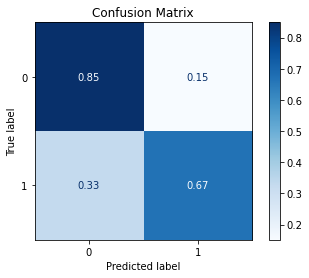

0.7932960893854749


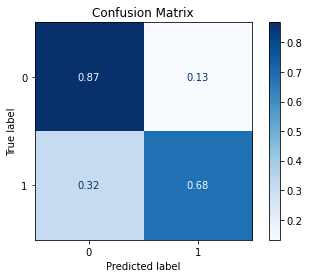

0.7150837988826816


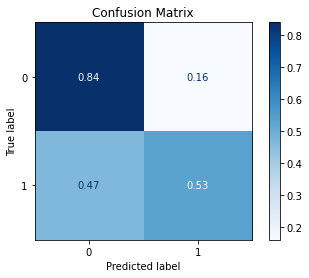

0.7597765363128491


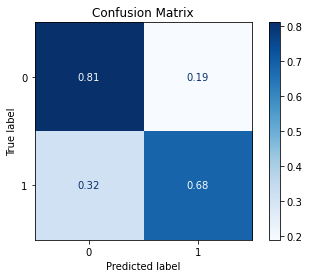

0.776536312849162


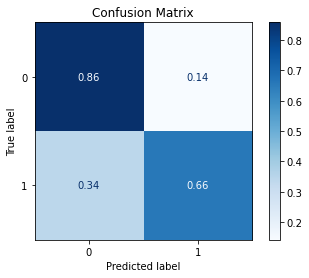

0.7821229050279329


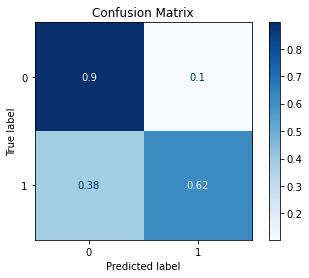

In [75]:
classList = [svcClass, ldaClass, kncClass, gnbClass, dtcClass, rfcClass]
for classifier in classList:
    print(testAccuracy(classifier))
    confMatrix(classifier)

In [82]:
from sklearn.ensemble import VotingClassifier
vcClass = VotingClassifier(estimators=[('lda',ldaClass),
                                       ('rf',rfcClass),
                                       ('svc',svcClass),
                                       ('knc',kncClass),
                                       ('gnb',gnbClass),
                                       ('dtc',dtcClass)]).fit(X_train, y_train)

0.7932960893854749


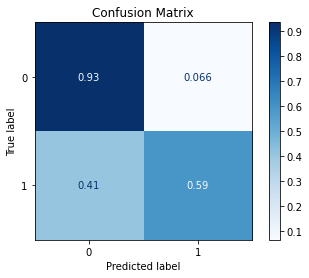

In [83]:
print(testAccuracy(vcClass))
confMatrix(vcClass)

0.8044692737430168


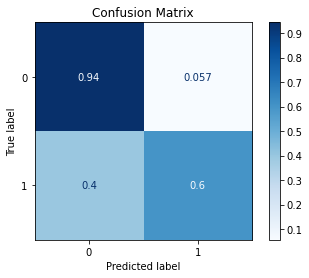

In [95]:
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=5).fit(X_train, y_train)
print(testAccuracy(model))
confMatrix(model)